## Predicting Vaccination Patterns Using 2009 H1N1 Flu Pandemic Data

## Business Understanding

The primary goal of this project is to support public health efforts by understanding the factors influencing vaccination uptake during the 2009 H1N1 influenza pandemic. By analyzing data from the National 2009 H1N1 Flu Survey, the project aims to identify key demographic, behavioral, and attitudinal predictors of vaccination. This understanding is crucial for informing future vaccination campaigns, especially for addressing hesitancy and improving outreach strategies. Stakeholders, such as public health policymakers, healthcare organizations, and vaccination campaign planners, can use these insights to design targeted interventions that increase vaccine acceptance and coverage, ultimately reducing the spread of infectious diseases and safeguarding public health

### Problem Statement

During the 2009 H1N1 influenza pandemic, significant challenges arose in achieving widespread vaccine uptake, despite the availability of an effective vaccine. Understanding why some individuals chose to receive the vaccine while others did not is a critical problem for public health, as similar barriers persist in contemporary vaccination efforts, such as those for COVID-19. This project seeks to address the problem of predicting vaccination behavior based on individual characteristics, including demographics, health behaviors, and attitudes toward vaccination. By identifying the factors most strongly associated with vaccine uptake, public health authorities can better tailor communication strategies and interventions to address vaccine hesitancy and improve immunization rates in future health crises.

### Objectives

1. To predict whether individuals received the H1N1 or seasonal flu vaccine.
2. To identify key factors influencing vaccination decisions.
3. To provide insights for public health vaccination campaigns.
4. To evaluate the performance of the predictive model using appropriate metrics.
5. To inform strategies for improving vaccine coverage and addressing hesitancy.

### Research Questions

1. What demographic, behavioral, and attitudinal factors are most strongly associated with receiving the H1N1 or seasonal flu vaccine?
2. Can a predictive model accurately classify individuals based on their likelihood of vaccination?
3. How do perceptions of vaccine safety and efficacy influence vaccination decisions?
4. Are certain population groups more likely to decline vaccination, and why?
5. How can insights from the 2009 H1N1 vaccination data inform future public health campaigns?

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from ydata_profiling import ProfileReport
import optuna

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import  StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report,  roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Data Staging

In [2]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('H1N1_Flu_Vaccines.csv')
df.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               NaN                   NaN   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          3.0                1.0   
1               1.0                          5.0                4.0   
2               NaN                          3.0                1.0   
3               NaN                          3.0                3.0   
4               NaN                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          4.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          4.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own         

In [4]:
df.tail()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
26702                    0.0               0.0                   0.0   
26703                    0.0               1.0                   1.0   
26704                    1.0               0.0                   0.0   
26705                    NaN               0.0                   0.0   
26706                    0.0               0.0                   0.0   

       chronic_med_condition  child_under_6_months  health_worker  \
26702                    0.0                   0.0            0.0   
26703                    0.0                   0.0            1.0   
26704                    0.0                   0.0            0.0   
26705                    0.0                   0.0            0.0   
26706                    0.0                   0.0            0.0   

       health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
26702               NaN                          3.0                1.0   
26703               1.0                          4.0                2.0   
26704               NaN                          4.0                4.0   
26705               0.0                          3.0                1.0   
26706               1.0                          5.0                1.0   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
26702                          1.0                          5.0   
26703                          2.0                          5.0   
26704                          2.0                          5.0   
26705                          2.0                          2.0   
26706                          1.0                          5.0   

       opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
26702                2.0                          2.0      65+ Years   
26703                1.0                          1.0  18 - 34 Years   
26704                4.0                          2.0  55 - 64 Years   
26705                1.0                          2.0  18 - 34 Years   
26706                1.0                          1.0      65+ Years   

              education      race     sex             income_poverty  \
26702      Some College     White  Female  <= $75,000, Above Poverty   
26703  College Graduate     White    Male  <= $75,000, Above Poverty   
26704      Some College     White  Female                        NaN   
26705      Some College  Hispanic  Female  <= $75,000, Above Poverty   
26706      Some College     White    Male  <= $75,000, Above Poverty   

      marital_status rent_or_own   employment_status hhs_geo_region  \
26702    Not Married         Own  Not in Labo

## Data Understanding

The dataset for this project is sourced from the National 2009 H1N1 Flu Survey, conducted during the H1N1 influenza pandemic. It contains information on individuals' demographic characteristics, health behaviors, and attitudes toward vaccines, along with their self-reported vaccination status for the H1N1 and seasonal flu vaccines. The dataset includes both categorical and numerical features, with variables such as age, income, education, perceptions of vaccine safety, and healthcare access. Initial exploration reveals potential data quality issues, including missing values and imbalanced target classes, which will require preprocessing and careful handling. By analyzing the properties and relevance of these features, the project aims to assess how well the data can support the development of a predictive model to address the problem of vaccine hesitancy and improve public health strategies.

### Profile Report

From the profile report below the following can be deduced.
1. There are 38 variables in the data.
2. The data has 26,707 observations.
3. The data has 6% missing values.
4. High correlation exists in the data.
   - behavioral_large_gatherings is highly overall correlated with behavioral_outside_home
   - doctor_recc_h1n1 is highly overall correlated with doctor_recc_seasonal
   - employment_industry is highly overall correlated with employment_status and 1 employment_occupation
   - health_worker is highly overall correlated with employment_industry and 1 other fields
   - household_adults is highly overall correlated with marital_status
5. Class imbalance does exist

In [5]:
Profile = ProfileReport(df, title = 'H1N1 Flu Profile', explorative = True)
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.shape

(26707, 38)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

## Data Preparation

Data preparation for this project involves several critical steps to ensure the dataset is suitable for analysis and modeling. With 38 variables and 26,707 observations, the data contains 6% missing values, which will be addressed through imputation or removal based on their significance and distribution. High correlations among variables, such as those between behavioral_large_gatherings and behavioral_outside_home or doctor_recc_h1n1 and doctor_recc_seasonal, necessitate careful examination to avoid redundancy and multicollinearity in the model. Additionally, class imbalance in the target variable will be addressed using techniques such as resampling or specialized algorithms to ensure balanced model performance. Categorical variables, including employment_industry and health_worker, will be encoded appropriately, and irrelevant or redundant features will be identified and removed. These steps aim to create a clean, balanced, and informative dataset for effective analysis and modeling.

### Data Cleaning

Here, I dropped columns with a high number of missing values and highly correlated columns. Then, for the numerical columns with missing values, I imputed using mean the for categorical columns rows with missing values, I dropped.

In [8]:
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [9]:
# Handling missing value and highly correlated features. 
# Drop columns with a lot of missing data  
df.drop(columns = ['employment_industry', 'employment_occupation', 'health_insurance', 'doctor_recc_seasonal', 'marital_status', 'behavioral_outside_home'], inplace = True)

In [10]:
# Handling missing values. 
# Imputation on numerical columns
numeric_columns = df.select_dtypes(include = ['number']).columns.tolist()
numerical_columns_to_fill = [ 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children',]
for col in numerical_columns_to_fill:
    df[col] = df[col].fillna(df[col].mean())

In [11]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_touch_face',
       'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months',
       'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'rent_or_own',
       'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [12]:
# Handling missing values
df = df.dropna(subset=['education', 'income_poverty', 'rent_or_own', 'employment_status'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21954 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                21954 non-null  int64  
 1   h1n1_concern                 21954 non-null  float64
 2   h1n1_knowledge               21954 non-null  float64
 3   behavioral_antiviral_meds    21954 non-null  float64
 4   behavioral_avoidance         21954 non-null  float64
 5   behavioral_face_mask         21954 non-null  float64
 6   behavioral_wash_hands        21954 non-null  float64
 7   behavioral_large_gatherings  21954 non-null  float64
 8   behavioral_touch_face        21954 non-null  float64
 9   doctor_recc_h1n1             21954 non-null  float64
 10  chronic_med_condition        21954 non-null  float64
 11  child_under_6_months         21954 non-null  float64
 12  health_worker                21954 non-null  float64
 13  opinion_h1n1_vacc_eff

In [14]:
# Check for duplicates
df.duplicated().sum()

0

## Explanatory Data Analysis

In [15]:
df.describe()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   21954.000000  21954.000000    21954.000000               21954.000000   
mean    13327.114558      1.618890        1.294168                   0.047982   
std      7716.541065      0.891841        0.598524                   0.213490   
min         0.000000      0.000000        0.000000                   0.000000   
25%      6648.250000      1.000000        1.000000                   0.000000   
50%     13326.500000      2.000000        1.000000                   0.000000   
75%     20014.750000      2.000000        2.000000                   0.000000   
max     26706.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          21954.000000          21954.000000           21954.000000   
mean               0.736484              0.067445               0.830798   
std                0.439076              0.250739               0.374755   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_touch_face  doctor_recc_h1n1  \
count                 21954.000000           21954.000000      21954.000000   
mean                      0.352790               0.678431          0.224545   
std                       0.477202               0.466140          0.401739   
min                       0.000000               0.000000          0.000000   
25%                       0.000000               0.000000          0.000000   
50%                       0.000000               1.000000          0.000000   
75%                       1.000000               1.000000          0.220312   
max                       1.000000               1.000000          1.000000   

       chronic_med_condition  child_under_6_months  health_worker  \
count           21954.000000          21954.000000   21954.000000   
mean                0.282936              0.082771       0.116618   
std                 0.448708              0.275530       0.320894   
min                 0.000000              0.000000       0.000000   
25%                 0.000000              0.000000       0.000000   
50%                 0.000000              0.000000       0.000000   
75%                 1.000000              0.000000       0.000000   
max                 1.000000              1.000000       1.000000   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 21954.000000       21954.000000   
mean                      3.898808           2.361100   
std                       0.984891           1.289411   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 21954.000000                 21954.000000   
mean                      2.350773                     4.053003   
std                       1.353209                     1.066020   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       21954.000000                 21954.000000       21954

In [16]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_touch_face',
       'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months',
       'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'rent_or_own',
       'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

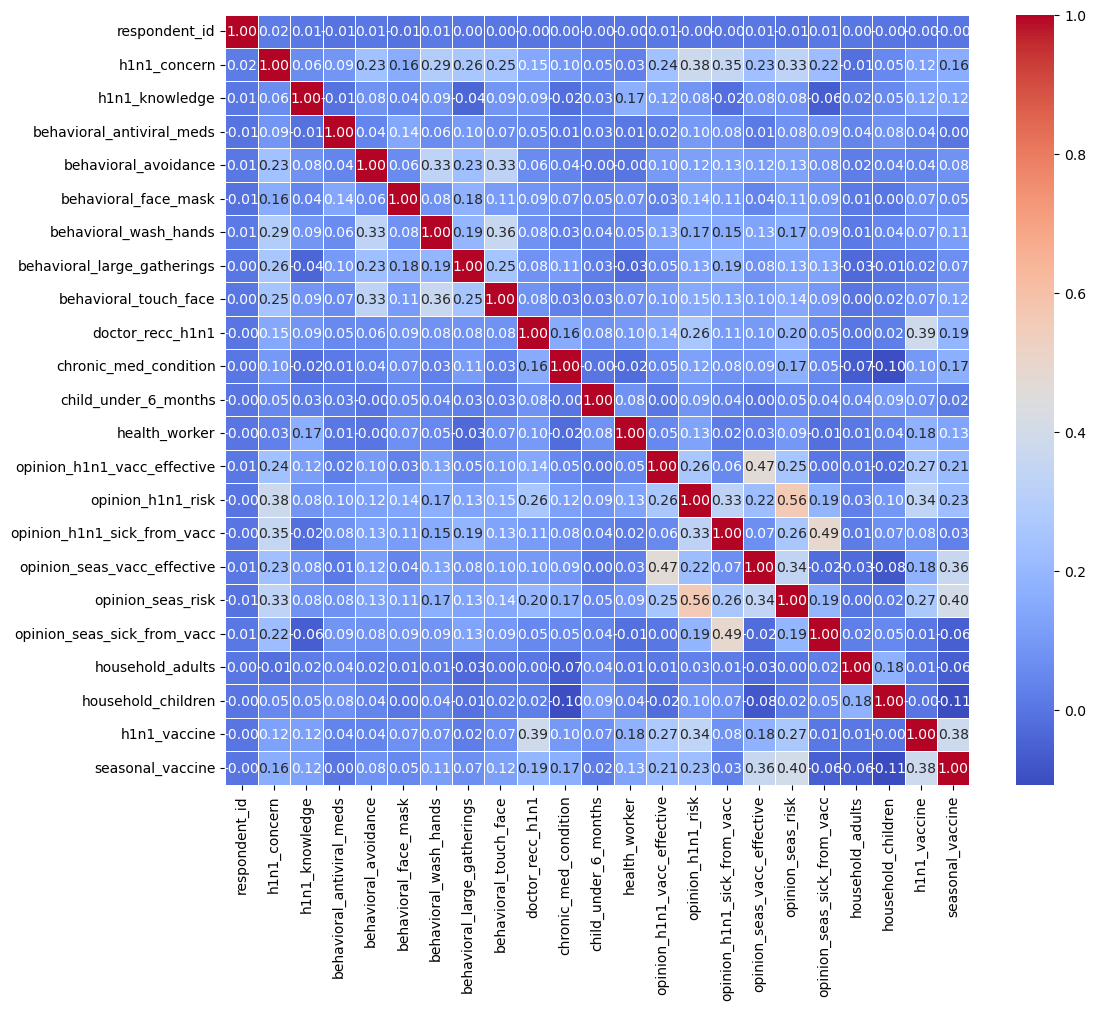

In [17]:
df_corr = df.select_dtypes(include = 'number')
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

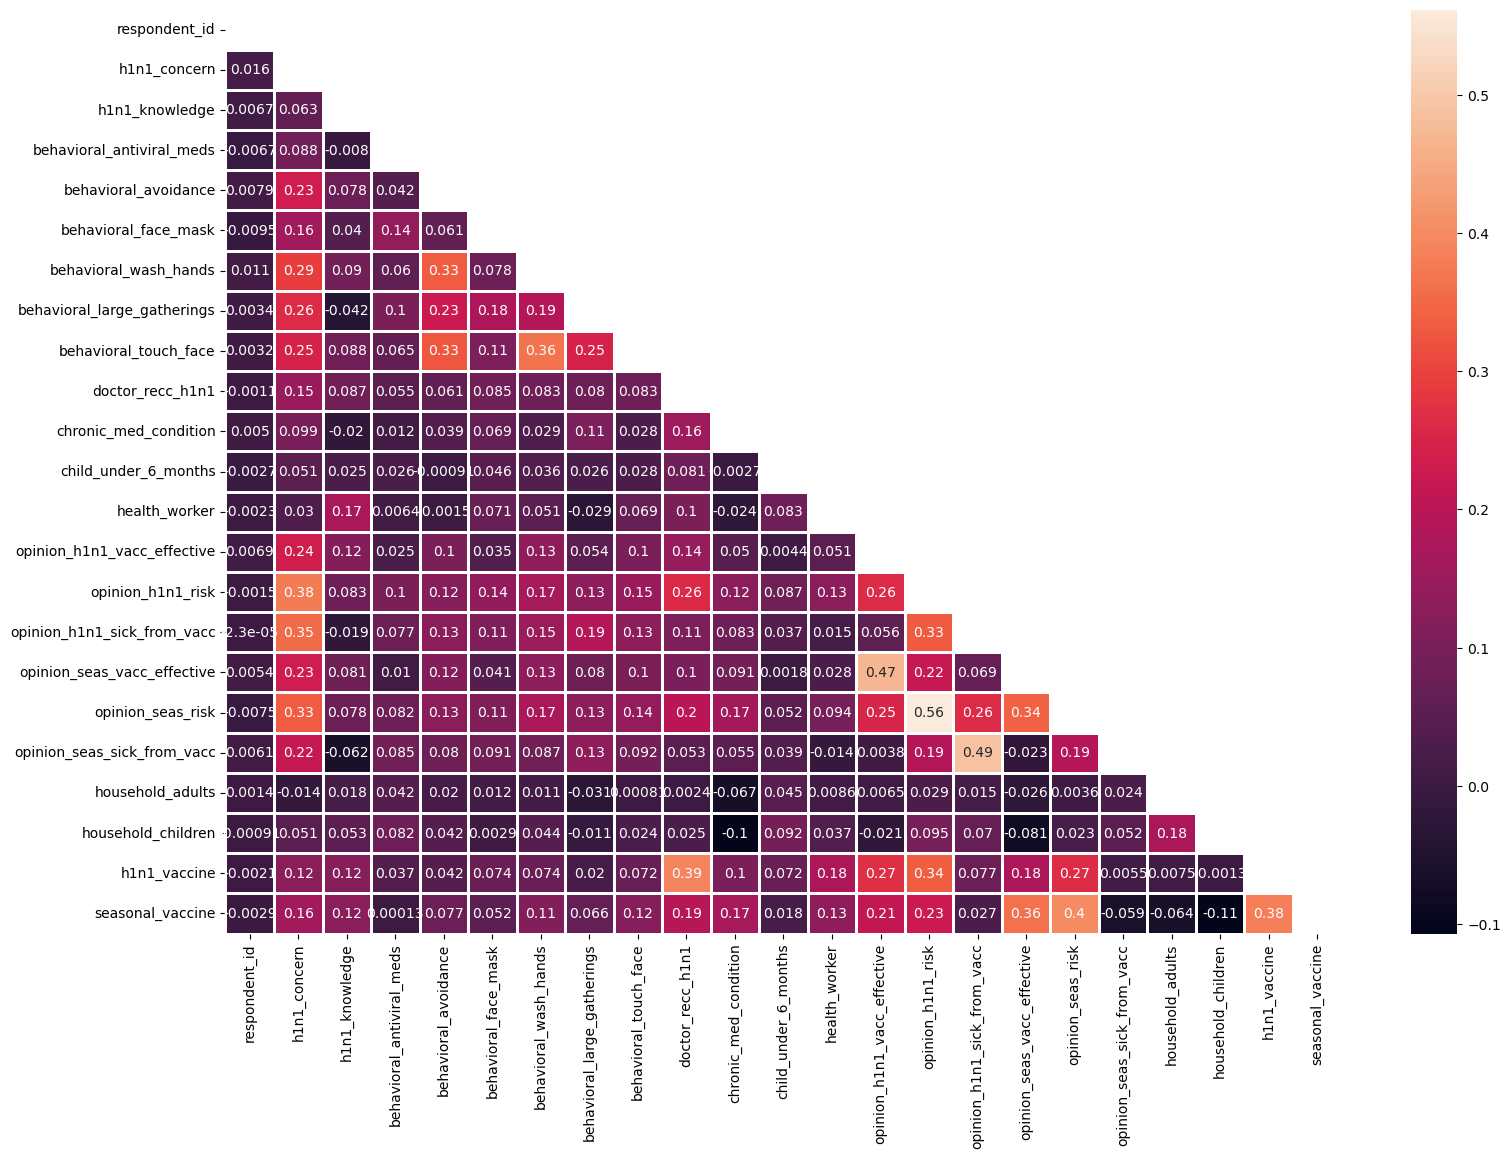

In [18]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df_corr.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

From the heat map above, there is a low and moderate correlation between the independent variables, indicating minimal multicollinearity, which is beneficial for building reliable predictive models for H1N1 Vaccine. This suggests that each variable contributes unique information to the prediction process, improving model interpretability and accuracy.

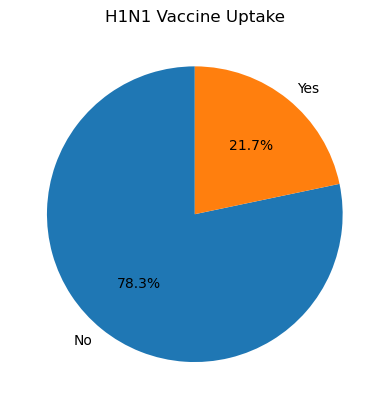

In [19]:
h1n1_vaccine_dist = df['h1n1_vaccine'].value_counts()
h1n1_vaccine_dist.plot.pie(autopct='%1.1f%%', labels=['No', 'Yes'], startangle=90)
plt.title('H1N1 Vaccine Uptake')
plt.ylabel('')
plt.show()

The target variable H1N1 Vaccine has a class imbalance with with class No being the highest at 78.3%

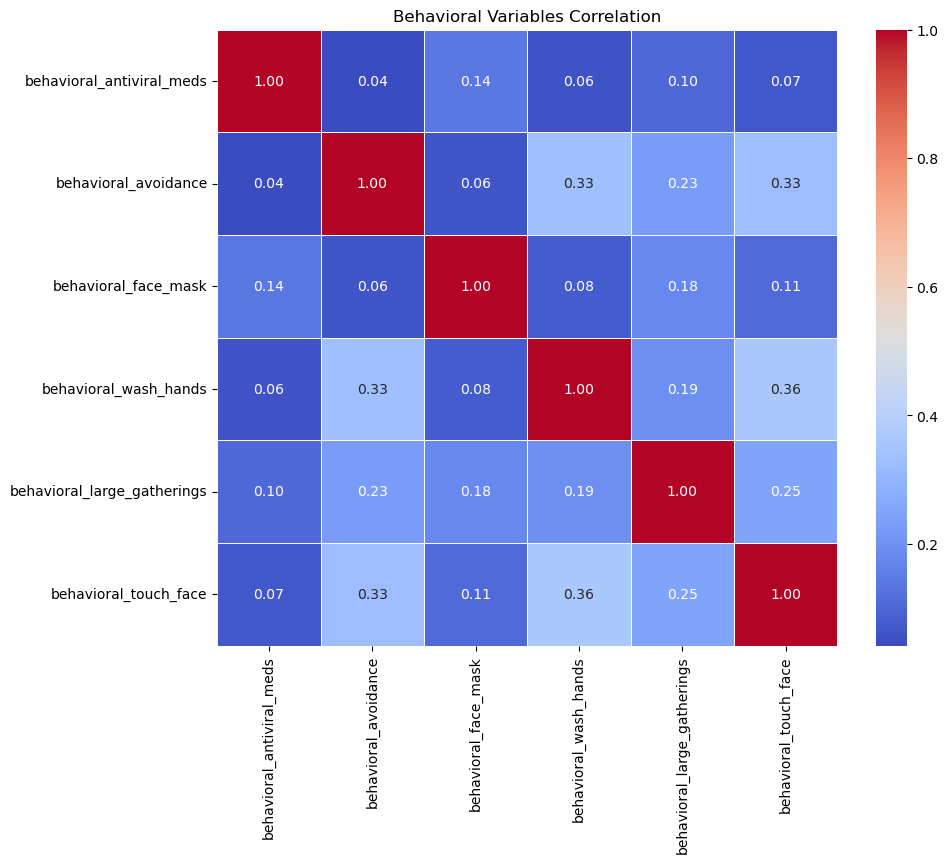

In [21]:
behavioral_cols = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
                   'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_touch_face']
plt.figure(figsize=(10, 8))
sns.heatmap(df[behavioral_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Behavioral Variables Correlation')
plt.show()


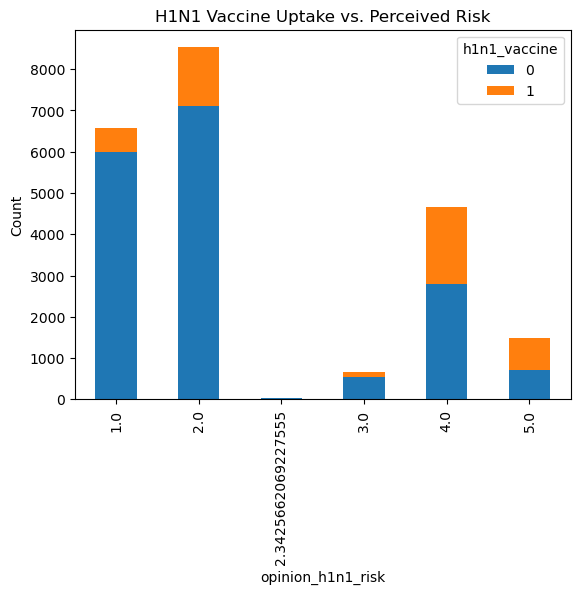

In [22]:
df_grouped = df.groupby(['opinion_h1n1_risk', 'h1n1_vaccine']).size().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.title('H1N1 Vaccine Uptake vs. Perceived Risk')
plt.ylabel('Count')
plt.show()

The bar chart illustrates the relationship between the perceived risk of H1N1 (on a scale of 1 to 5) and vaccine uptake. It shows that higher perceived risk (levels 4 and 5) correlates with increased vaccine uptake, whereas lower perceived risk (levels 1 and 2) is associated with significantly fewer people choosing to vaccinate.

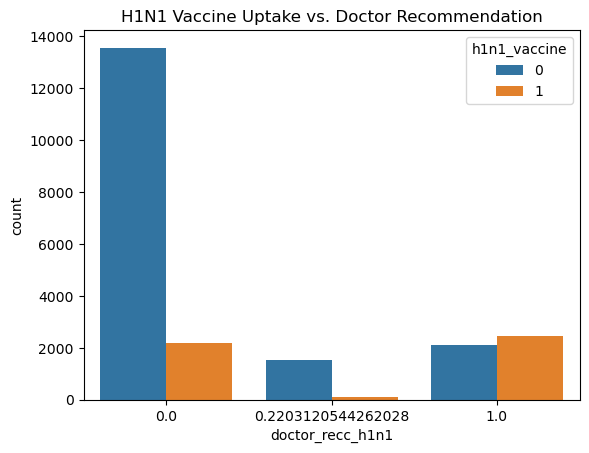

In [24]:
sns.countplot(x='doctor_recc_h1n1', hue='h1n1_vaccine', data=df)
plt.title('H1N1 Vaccine Uptake vs. Doctor Recommendation')
plt.show()

The bar chart highlights the influence of doctor recommendations on H1N1 vaccine uptake. Individuals who received a doctor’s recommendation (value 1) showed a significantly higher proportion of vaccine uptake than those who did not (value 0), where most chose not to vaccinate.

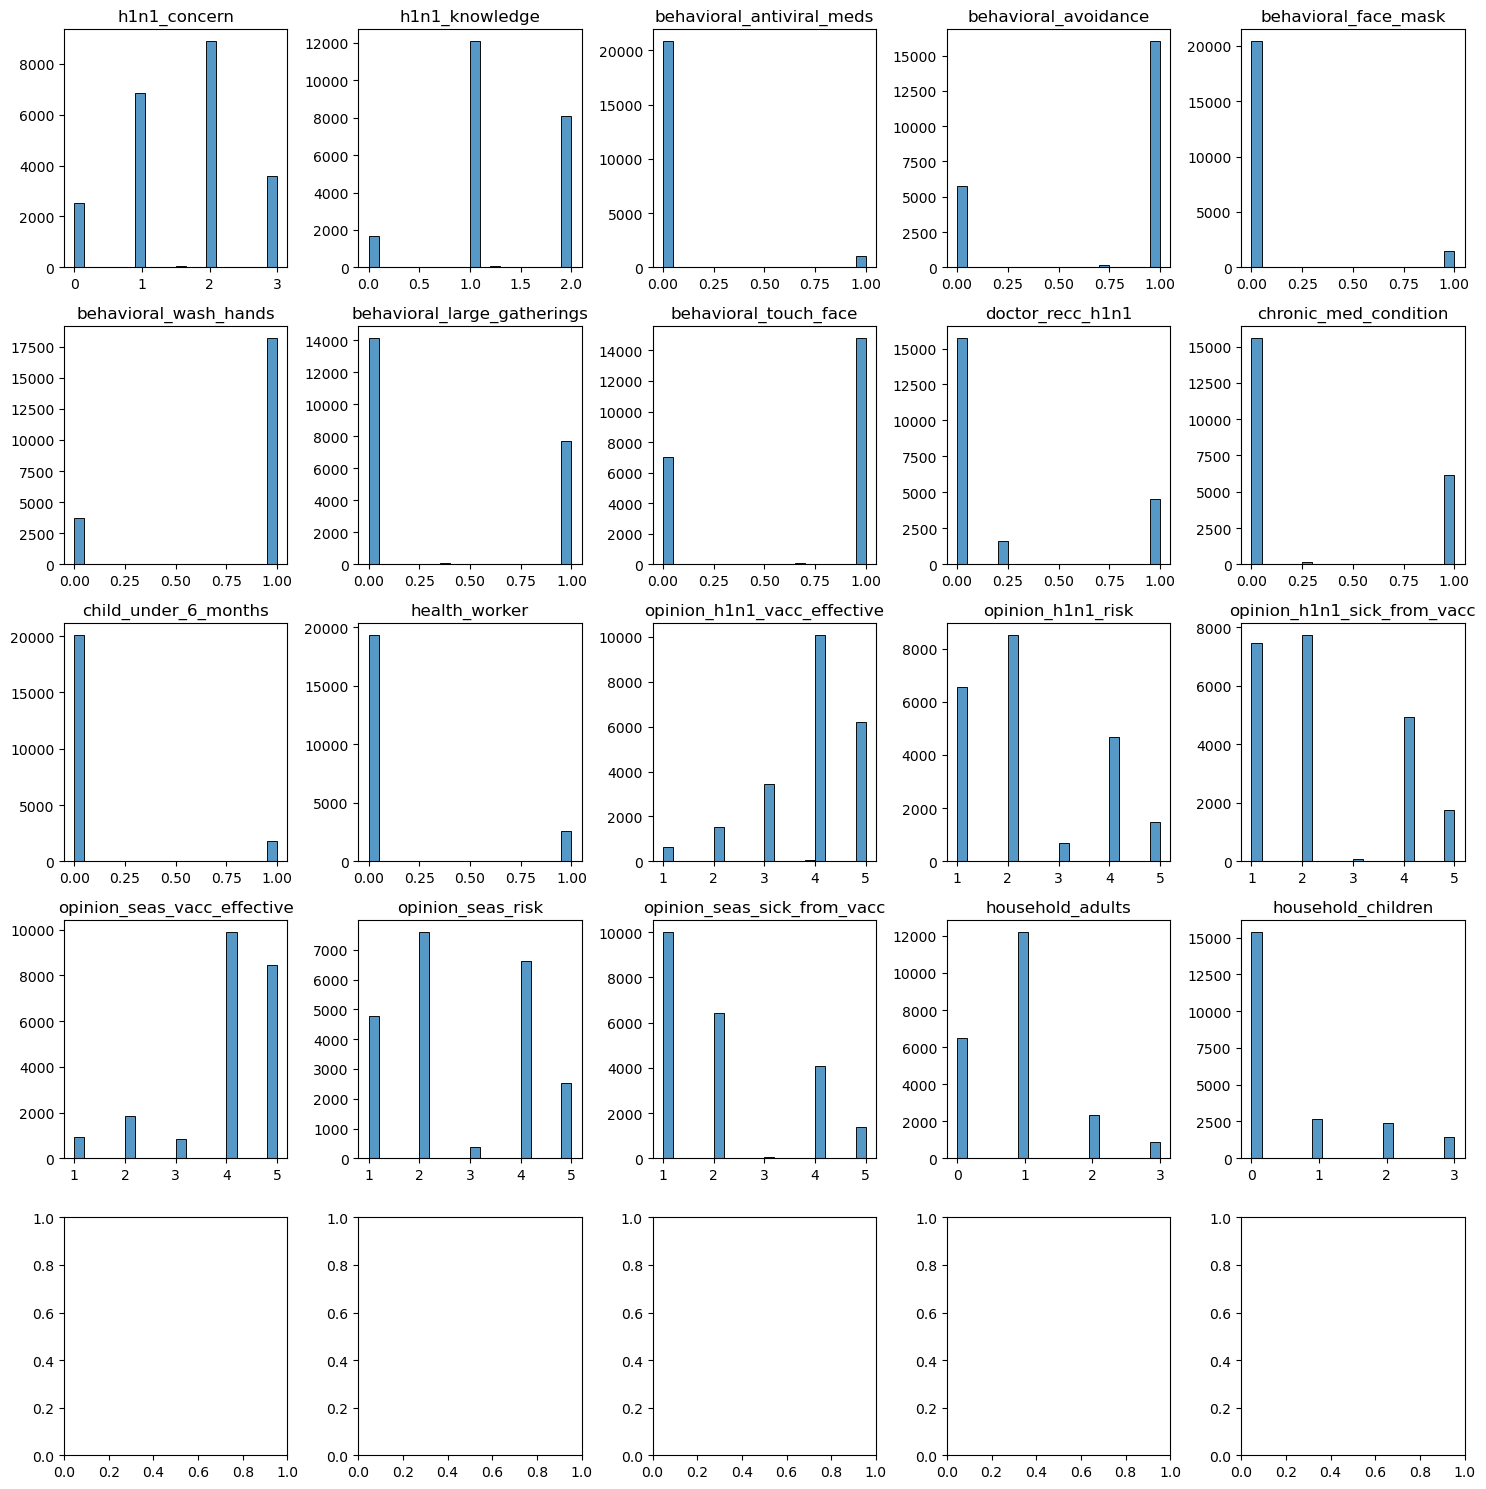

In [27]:
# Visualize the numerical columns
num_cols = len(numerical_columns_to_fill)
fig, axes = plt.subplots(nrows=(num_cols // 5) + 1, ncols=5, figsize=(15, 3 * (num_cols // 5 + 1)))

axes = axes.flatten()

for i, col in enumerate(numerical_columns_to_fill):
    sns.histplot(df[col], ax=axes[i], kde=False, bins=20)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

## Data Preprocessing

In [28]:
df['h1n1_vaccine'].value_counts()

h1n1_vaccine
0    17188
1     4766
Name: count, dtype: int64

In [29]:
# One-Hot Encoding for categorical features
# Identify columns
categorical_variables = df.select_dtypes(include = [object])
categorical_variables
variables_to_encode = categorical_variables.columns
df = pd.get_dummies(df,columns = variables_to_encode,drop_first = True,dtype = int)

In [30]:
X = df.drop(["h1n1_vaccine"], axis=1)
y = df["h1n1_vaccine"]

In [100]:
nm = NearMiss(version = 1 , n_neighbors = 10)

X, y = nm.fit_resample(X,y)
y.value_counts()

h1n1_vaccine
0    17188
1    17188
Name: count, dtype: int64

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
X_train_df = X_train

In [103]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

## Modelling

### Baseline Model

In [104]:
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X, y, test_size=0.2, random_state=42)      

In [105]:
# Instantiate and train the Logistic Regression model
baseline_model = LogisticRegression()
baseline_model.fit(X_train_baseline, y_train_baseline)

LogisticRegression()

In [106]:
y_test_pred_baseline = baseline_model.predict(X_test_baseline)
y_train_pred_baseline = baseline_model.predict(X_train_baseline)

In [107]:
# Logistic Regression Evaluation
print("Logistic Regression Evaluation:")

print("Training accuracy of Logistic Regression is: {:.4f}".format(accuracy_score(y_train_baseline, y_train_pred_baseline)))
print("Test accuracy of Logistic Regression is: {:.4f}".format(accuracy_score(y_test_baseline, y_test_pred_baseline)))

print("Classification Report:\n", classification_report(y_test_baseline, y_test_pred_baseline))
print("Confusion Matrix:\n", confusion_matrix(y_test_baseline, y_test_pred_baseline))

Logistic Regression Evaluation:
Training accuracy of Logistic Regression is: 0.8594
Test accuracy of Logistic Regression is: 0.8521
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      3437
           1       0.85      0.85      0.85      3439

    accuracy                           0.85      6876
   macro avg       0.85      0.85      0.85      6876
weighted avg       0.85      0.85      0.85      6876

Confusion Matrix:
 [[2923  514]
 [ 503 2936]]


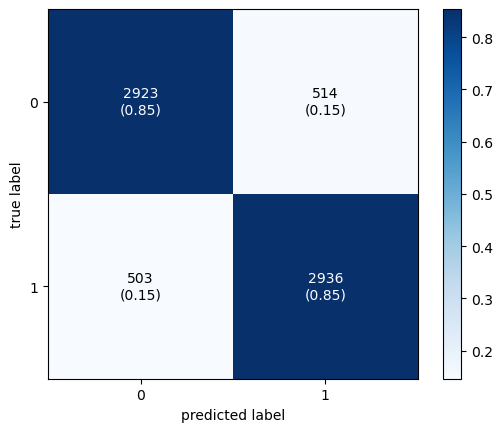

In [108]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test_baseline,y_test_pred_baseline)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

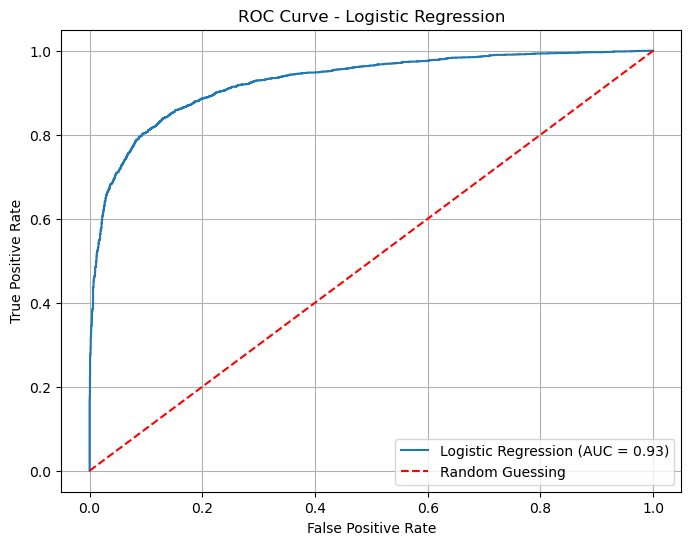

In [109]:
# Plot ROC Curve for Logistic Regression
y_probs_baseline = baseline_model.predict_proba(X_test_baseline)[:, 1]
fpr, tpr, _ = roc_curve(y_test_baseline, y_probs_baseline)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guessing')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Logistic Regression

In [110]:
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train , y_train)

LogisticRegression(C=1, max_iter=200, solver='liblinear')

In [111]:
y_test_pred_lg = log_reg.predict(X_test)
y_train_pred_lg = log_reg.predict(X_train)

In [112]:
# Logistic Regression Evaluation
print("Logistic Regression Evaluation:")

print("Training accuracy of Logistic Regression is: {:.4f}".format(accuracy_score(y_train, y_train_pred_lg)))
print("Test accuracy of Logistic Regression is: {:.4f}".format(accuracy_score(y_test, y_test_pred_lg)))

print("Classification Report:\n", classification_report(y_test, y_test_pred_lg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_lg))

Logistic Regression Evaluation:
Training accuracy of Logistic Regression is: 0.8783
Test accuracy of Logistic Regression is: 0.8722
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      3437
           1       0.89      0.86      0.87      3439

    accuracy                           0.87      6876
   macro avg       0.87      0.87      0.87      6876
weighted avg       0.87      0.87      0.87      6876

Confusion Matrix:
 [[3055  382]
 [ 497 2942]]


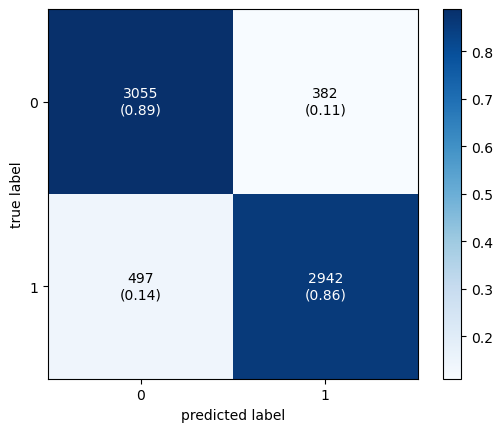

In [113]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_test_pred_lg)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

The confusion matrix evaluates the performance of the logistic regression model on test data. It shows that the model correctly classified 3055 true negatives (class 0) and 2942 true positives (class 1), achieving high accuracy for both classes. However, there are 382 false positives and 497 false negatives, indicating some misclassifications that could be improved with further model optimization or additional features.

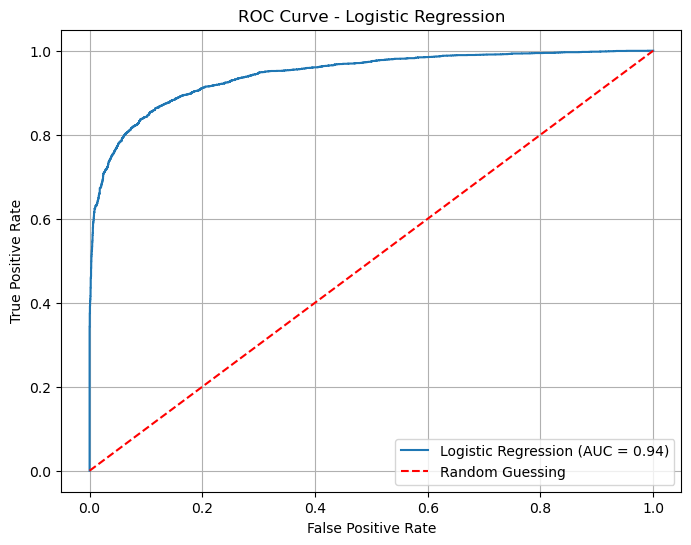

In [114]:
# Plot ROC Curve for Logistic Regression
y_probs = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guessing')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

The logistic Model is the best-performing model since it has the highest area under the curve of 0.94

### Decision Trees

In [150]:
# Define the model (estimator)
model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid (param_grid) to search over
param_grid = {
    'criterion': ['gini', 'entropy'],  # Decision Tree criteria for splitting
    'max_depth': [3, 5, 10, None],      # Max depth of the tree
    'min_samples_split': [2, 5, 10],    # Min samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Min samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider for a split
    'splitter': ['best', 'random']  # Strategy used to split at each node
}

# Create GridSearchCV with reduced parallelism (e.g., n_jobs=4)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=4, verbose=3, cv=5)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Best cross-validation score: 0.8805


In [161]:
dtc = DecisionTreeClassifier(random_state = 42, max_depth = 3)
dtc.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [162]:
y_test_pred_dt = dtc.predict(X_test)
y_train_pred_dt = dtc.predict(X_train)

In [163]:
# Decision Tree Evaluation
print("Decision Tree Evaluation:")

print("Training accuracy of Decision Tree is: {:.4f}".format(accuracy_score(y_train, y_train_pred_dt)))
print("Test accuracy of Decision Tree is: {:.4f}".format(accuracy_score(y_test, y_test_pred_dt)))

print("Classification Report:\n", classification_report(y_test, y_test_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_dt))

Decision Tree Evaluation:
Training accuracy of Decision Tree is: 0.8065
Test accuracy of Decision Tree is: 0.8040
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      3437
           1       0.81      0.80      0.80      3439

    accuracy                           0.80      6876
   macro avg       0.80      0.80      0.80      6876
weighted avg       0.80      0.80      0.80      6876

Confusion Matrix:
 [[2789  648]
 [ 700 2739]]


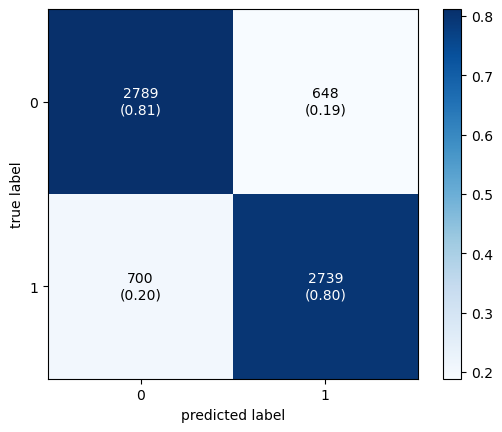

In [164]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_test_pred_dt)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

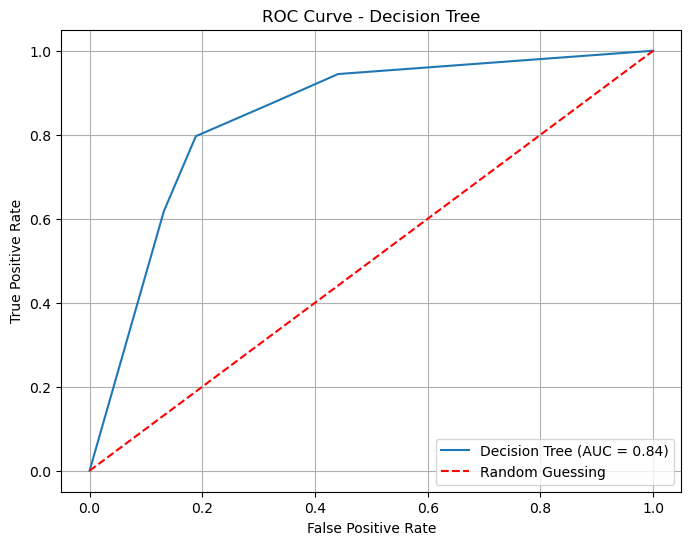

In [165]:
# Plot ROC Curve for Decision Tree Classifier
y_probs = dtc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guessing')
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

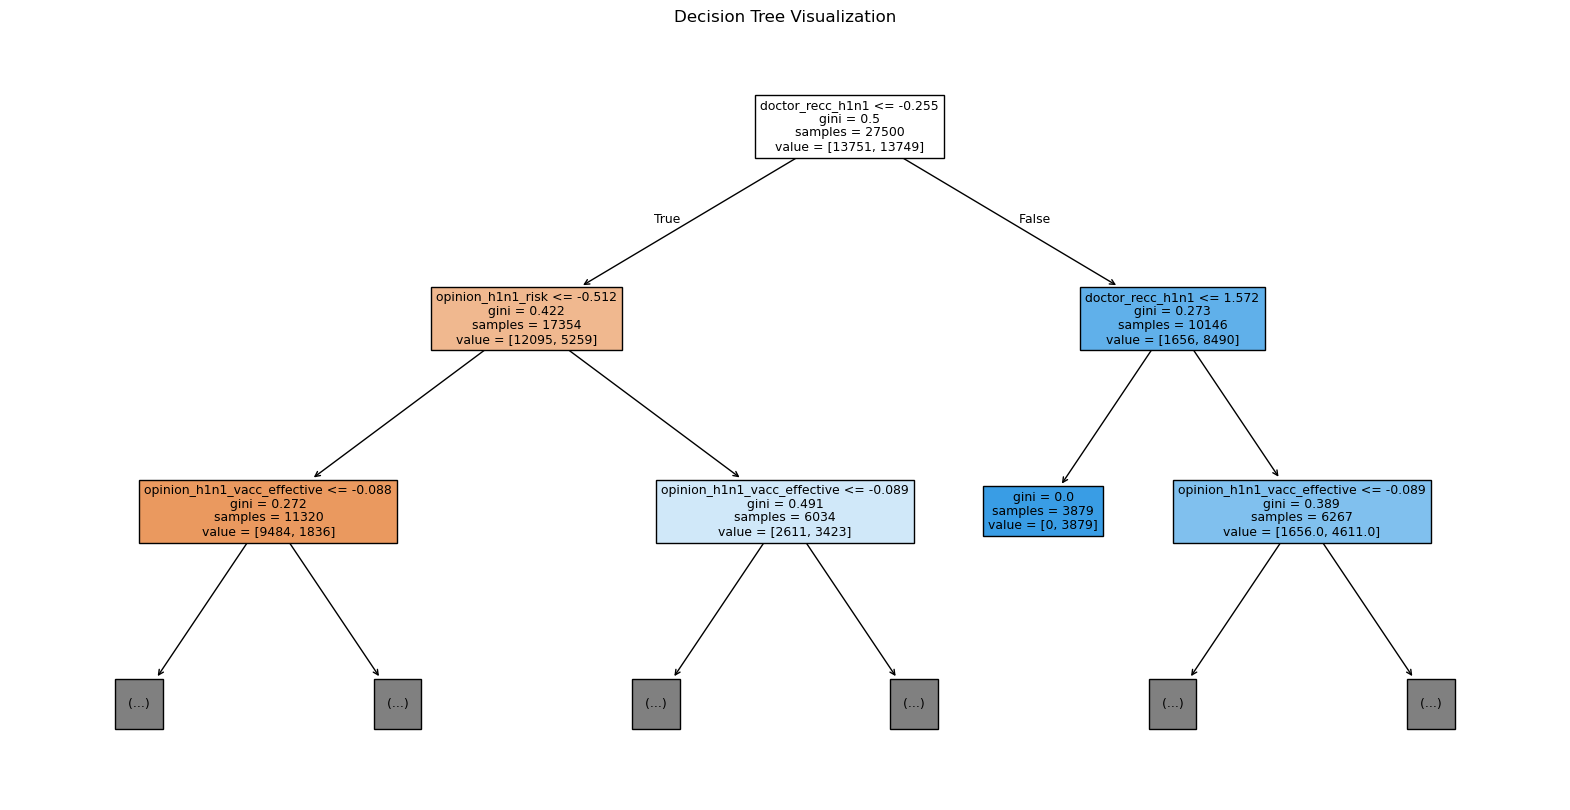

In [166]:
# Assuming `dtc` is your trained DecisionTreeClassifier
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(dtc, 
          filled=True, 
          feature_names=X_train_df.columns,  # Replace with the names of your features
          max_depth=2)  # Limit depth for clarity if desired
plt.title("Decision Tree Visualization")
plt.show()

### Random Forest

In [193]:
random_forest = RandomForestClassifier(n_estimators = 109, max_depth = 26, min_samples_split = 3, 
                                       min_samples_leaf = 2, max_features = 'log2', bootstrap = True, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=26, max_features='log2', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=109, random_state=42)

In [194]:
y_test_pred_rf = random_forest.predict(X_test)
y_train_pred_rf = random_forest.predict(X_train)

In [195]:
print("Random Forest Evaluation:")

print("Training accuracy of Random Forest is: {:.4f}".format(accuracy_score(y_train, y_train_pred_rf)))
print("Test accuracy of Random Forest is: {:.4f}".format(accuracy_score(y_test, y_test_pred_rf)))

print("Classification Report:\n", classification_report(y_test, y_test_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))

Random Forest Evaluation:
Training accuracy of Random Forest is: 0.9712
Test accuracy of Random Forest is: 0.8266
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80      3437
           1       0.77      0.94      0.84      3439

    accuracy                           0.83      6876
   macro avg       0.85      0.83      0.82      6876
weighted avg       0.85      0.83      0.82      6876

Confusion Matrix:
 [[2444  993]
 [ 199 3240]]


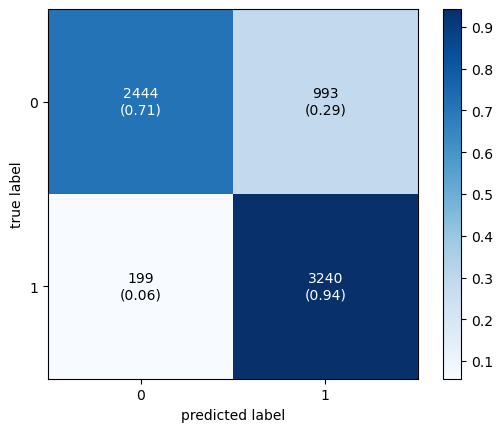

In [196]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_test_pred_rf)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

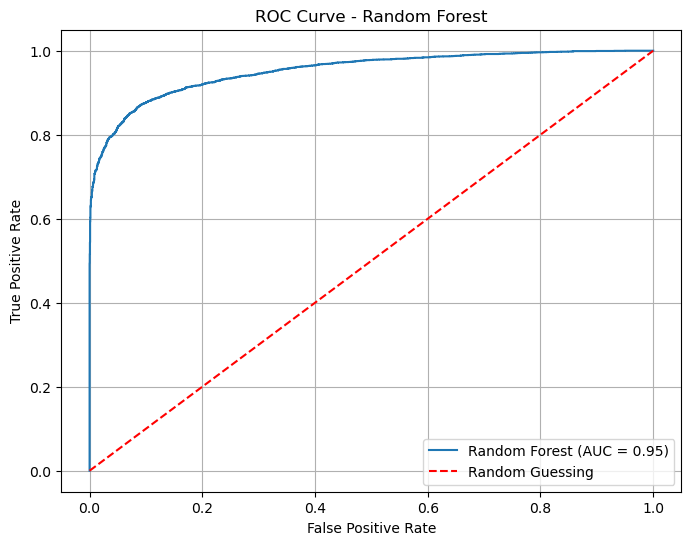

In [197]:
# Plot ROC Curve for Random Forest Classifier
y_probs = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guessing')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

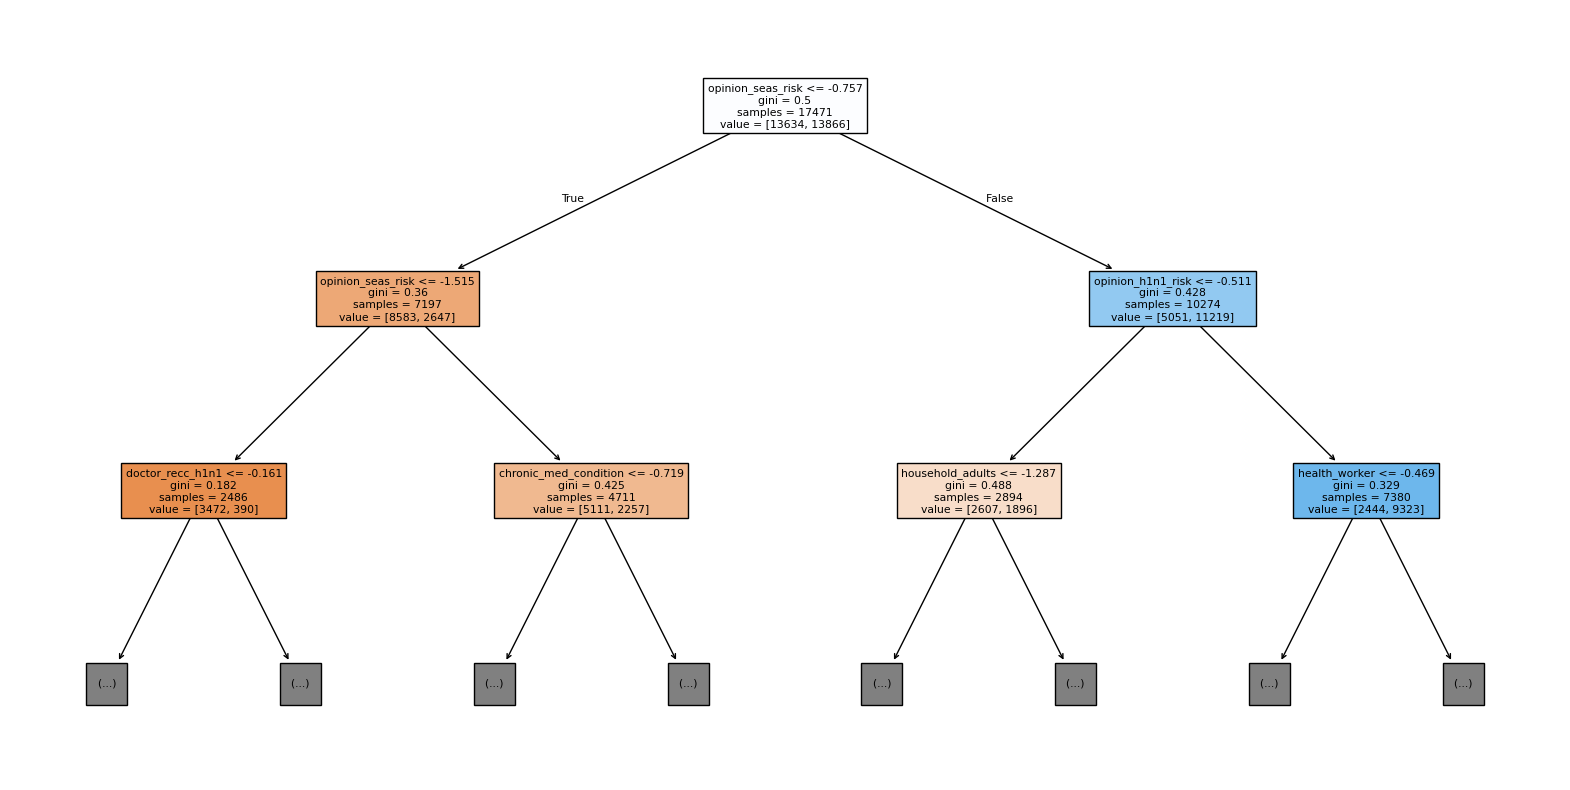

In [198]:
plt.figure(figsize=(20,10))
plot_tree(random_forest.estimators_[0], filled=True, feature_names=X.columns, max_depth=2)
plt.show()